# Import nltk tools

In [164]:
import pandas as pd
import numpy as np

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Switch area
SUBJECT = 'zipper'
VOCAB_SIZE = 900
TEST_SIZE = 0.1 # proportion, the size of test_set

# Wrod processing

In [165]:
data = pd.read_csv('result/Matrix/' + SUBJECT + '_matrix.csv')

* Name the index as "MATERIAL_IDs"
* The matrix must has it unrepeated Id before import to here, show as the "Unnamed: 0".

In [166]:
data.head()

,Unnamed: 0,material,zipper
0,0,", , lm792, shell fabric at hood, above chest, ...",0
1,1,", , sotl085-pu01, shell fabric at hood, above ...",0
2,2,", , lm792, shell fabric at mid chest panels, ,...",0
3,3,", , sotl085-pu01, shell fabric at mid chest pa...",0
4,4,", , ym11-3527, stretch mesh , , , , back pocke...",0


* Change the col "Unnamed: 0" as "MATERIAL_ID"

In [167]:
data.rename( columns = {'Unnamed: 0': 'MATERIAL_ID'}, inplace = True)

In [168]:
data.head()

,MATERIAL_ID,material,zipper
0,0,", , lm792, shell fabric at hood, above chest, ...",0
1,1,", , sotl085-pu01, shell fabric at hood, above ...",0
2,2,", , lm792, shell fabric at mid chest panels, ,...",0
3,3,", , sotl085-pu01, shell fabric at mid chest pa...",0
4,4,", , ym11-3527, stretch mesh , , , , back pocke...",0


* Set the original index as Index

In [169]:
data.set_index('MATERIAL_ID', inplace = True)

In [170]:
data.tail()

,material,zipper
MATERIAL_ID,,
14583,", , Spring Toggle, Spring Toggles/2Hole, , , ,",0
14584,", , Retro Tape, Retro Tape/W:30mm, , , ,",0
14585,", , Velcro, Velcro-Hook, , , ,",0
14586,", , Velcro, Velcro-Loop, , , ,",0
14587,", , Seam Tape, , , , ,",0


## Nltk Function

In [171]:
def nltk_convert(col_of_df):
    '''
    Parameter of this function is a column of a dataFrame.
    
    '''
    # difine Stop words
    stop_words = set(stopwords.words('english'))
    # Difine Stemmer
    stemmer = SnowballStemmer('english')
    
    # converts to lower case and splits up the words
    words = word_tokenize(col_of_df)
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        # if word is not in the stop_words list and is not a alpha.
        if word not in stop_words and word.isalpha():
#             filtered_words.append(stemmer.stem(word))
            filtered_words.append(word)
            
    return filtered_words

* Test the function, with row 0, in column 'material'

In [172]:
nltk_convert(data.at[0, 'material'])

['shell',
 'fabric',
 'hood',
 'chest',
 'lower',
 'front',
 'body',
 'back',
 'body',
 'sleeves',
 'facing',
 'fabric',
 'windflap',
 'hood',
 'shockcord',
 'tunnel',
 'self',
 'fabric',
 'seam',
 'binding',
 'needed',
 'shockcord',
 'tunnel']

## Applying to the matrix
* the variable "nested_list" will hold the result.
* It is a series in this moment.

In [173]:
%%time
nested_list = data.material.apply(nltk_convert)

CPU times: user 4.16 s, sys: 370 ms, total: 4.53 s
Wall time: 4.66 s


In [174]:
type(nested_list)

pandas.core.series.Series

## True and False categories
* Exact the index of fabric materials, and non fabric materials

In [175]:
material_ids_ctg_1 = data[data[SUBJECT] == 1].index
material_ids_ctg_0 = data[data[SUBJECT] ==0].index

In [176]:
material_ids_ctg_1

Int64Index([    6,     7,    28,    29,    30,    53,    72,    73,    74,
              101,
            ...
            14555, 14556, 14558, 14559, 14561, 14567, 14568, 14570, 14571,
            14576],
           dtype='int64', name='MATERIAL_ID', length=1151)

### Get materials back by index
* Exact the strings in col 'material' by the index of doc_ids_fabric

In [177]:
nested_list_ctg_1 = nested_list.loc[material_ids_ctg_1]

In [178]:
nested_list_ctg_1

MATERIAL_ID
6        [dsbyg, coil, open, end, left, insert, dsbyg, ...
7        [e, coil, closed, end, slider, back, pocket, z...
28       [e, coil, open, end, left, insert, slider, cf,...
29       [dablh, e, coil, closed, end, dablh, slider, c...
30       [dablh, e, coil, closed, end, dablh, slider, h...
                               ...                        
14567                                    [pop, CF, zipper]
14568                                [pop, sleeve, pocket]
14570                                    [pop, CF, zipper]
14571                                [pop, sleeve, pocket]
14576                                    [pop, CF, zipper]
Name: material, Length: 1151, dtype: object

* by the index of doc_ids_trim

In [179]:
nested_list_ctg_0 = nested_list.loc[material_ids_ctg_0]

In [180]:
nested_list_ctg_0.shape[0]

13437

## Number of Distinct words
* The Ctg_1

In [181]:
flat_list_ctg_1 =[item for sublist in nested_list_ctg_1 for item in sublist]

In [182]:
ctg_1_words = pd.Series(flat_list_ctg_1).value_counts()

In [183]:
ctg_1_words.shape

(298,)

* The Ctg_0

In [184]:
flat_list_ctg_0 = [item for sublist in nested_list_ctg_0 for item in sublist]

In [185]:
ctg_0_words = pd.Series(flat_list_ctg_0).value_counts()

In [186]:
ctg_0_words.head()

pocket       1473
NUMBER       1435
label        1300
LOCATION     1204
REFERENCE    1182
dtype: int64

# Generate Vocabulary
## Top 10 words in Matrix (ctg_1 and ctg_0)

* It is same as function the nltk_convert, the difference is in the end of the funciton, it not append word directly, but word converted by function stemmer.stem.

In [187]:
def stemmered_nltk_convert(col_of_df):
    '''
    Parameter of this function is a column of a dataFrame.
    
    '''
    # difine Stop words
    stop_words = set(stopwords.words('english'))
    # Difine Stemmer
    stemmer = SnowballStemmer('english')
    
    # converts to lower case and splits up the words
    words = word_tokenize(col_of_df)
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        # if word is not in the stop_words list and is not a alpha.
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
            
    return filtered_words

In [188]:
%%time
stemmed_nested_list = data.material.apply(stemmered_nltk_convert)

CPU times: user 5.08 s, sys: 320 ms, total: 5.4 s
Wall time: 5.42 s


* Get flat list for all words

In [189]:
flat_stemmed_nested_list = [item for sublist in stemmed_nested_list for item in sublist]

* Turn it to a series

In [190]:
unique_words = pd.Series(flat_stemmed_nested_list).value_counts()

In [191]:
unique_words

pocket          2328
zipper          1920
label           1894
seam            1673
number          1576
                ... 
elasticcolor       1
legth              1
versatil           1
lamina             1
ast                1
Length: 1265, dtype: int64

* Set the size of vacabulary
* This size need to be tested a lot, in this cace, follow the e-mail processing lecture, I takes 10 % of total particular words

In [192]:
VOCAB_SIZE

900

In [193]:
frequent_words = unique_words[0:VOCAB_SIZE]

In [194]:
print('Most common words: \n', frequent_words[:10])

Most common words: 
 pocket    2328
zipper    1920
label     1894
seam      1673
number    1576
locat     1563
refer     1261
front     1250
back      1141
left      1109
dtype: int64


## Create Vocabulary with WORD_ID

In [195]:
word_ids = list(range(0, VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORD': frequent_words.index.values}, index = word_ids)
vocab.index.name = 'WORD_ID'
vocab.head()

,VOCAB_WORD
WORD_ID,
0,pocket
1,zipper
2,label
3,seam
4,number


* Save the vocabulary

In [196]:
vocab.to_csv('result/Trained Data/Vocabulary/'+SUBJECT+'_vocabulary.csv')

* Test the any word to see if it is in the vocabulary

In [197]:
'hangtag' in set(vocab.VOCAB_WORD)

True

## Search out the material with most token

In [198]:
clean_material_lengths = [len(sublist) for sublist in stemmed_nested_list]
print('Nr wrods in the longest material:', max(clean_material_lengths))

Nr wrods in the longest material: 71


In [199]:
print('Material position in the list', np.argmax(clean_material_lengths))

Material position in the list 10164


In [200]:
stemmed_nested_list[np.argmax(clean_material_lengths)]

['local',
 'sourc',
 'item',
 'must',
 'compli',
 'with',
 'cpsia',
 'test',
 'lead',
 'third',
 'parti',
 'must',
 'contain',
 'less',
 'ppm',
 'lead',
 'test',
 'result',
 'must',
 'submit',
 'approv',
 'sierra',
 'design',
 'develop',
 'team',
 'must',
 'submit',
 'sierra',
 'design',
 'apparel',
 'develop',
 'team',
 'approv',
 'prior',
 'use',
 'trim',
 'card',
 'pleas',
 'submit',
 'complet',
 'trim',
 'card',
 'prior',
 'sms',
 'product',
 'approv',
 'item',
 'substitut',
 'sms',
 'must',
 'clear',
 'note',
 'trim',
 'card',
 'pleas',
 'submit',
 'complet',
 'trim',
 'card',
 'prior',
 'bulk',
 'product',
 'approv',
 'this',
 'trim',
 'card',
 'must',
 'repres',
 'actual',
 'bulk',
 'materi']

# Generate Features & Spare Matrix
### Creating a DataFrame with one word per column

In [201]:
type(stemmed_nested_list)

pandas.core.series.Series

In [202]:
stemmed_nested_list

MATERIAL_ID
0        [shell, fabric, hood, chest, lower, front, bod...
1        [shell, fabric, hood, chest, lower, front, bod...
2                       [shell, fabric, mid, chest, panel]
3                       [shell, fabric, mid, chest, panel]
4                       [stretch, mesh, back, pocket, bag]
                               ...                        
14583                              [spring, toggl, spring]
14584                                 [retro, tape, retro]
14585                                             [velcro]
14586                                             [velcro]
14587                                         [seam, tape]
Name: material, Length: 14588, dtype: object

In [203]:
type(stemmed_nested_list.tolist())

list

In [204]:
word_col_df = pd.DataFrame.from_records(stemmed_nested_list.tolist())
word_col_df

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,shell,fabric,hood,chest,lower,front,bodi,back,bodi,sleev,...,None,None,None,None,None,None,None,None,None,None
1,shell,fabric,hood,chest,lower,front,bodi,back,bodi,sleev,...,None,None,None,None,None,None,None,None,None,None
2,shell,fabric,mid,chest,panel,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,shell,fabric,mid,chest,panel,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,stretch,mesh,back,pocket,bag,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14583,spring,toggl,spring,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
14584,retro,tape,retro,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
14585,velcro,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
14586,velcro,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


## Traning Set and Test Set
* Must import the method "train_test_split()" from sklearn

In [205]:
X_train, X_test, y_train, y_test = train_test_split(word_col_df, data[SUBJECT],
                                                    test_size = TEST_SIZE)

In [206]:
print('Nr of traning samples', X_train.shape[0])
print('Fraction of traning set', X_train.shape[0] / word_col_df.shape[0])

Nr of traning samples 13129
Fraction of traning set 0.8999862901014533


In [207]:
X_train.index.name = X_test.index.name = 'MATERIAL_ID'
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
11687,style,refer,sms,deliveri,date,date,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2204,line,velveti,tricot,suppli,soli,insid,waistband,handwarm,pocket,bag,...,None,None,None,None,None,None,None,None,None,None
9271,content,label,line,left,side,seam,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
10233,line,refer,number,locat,content,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2211,hardwar,snap,button,set,incl,washer,bang,snap,None,None,...,None,None,None,None,None,None,None,None,None,None


In [208]:
y_train.head()

MATERIAL_ID
11687    0
2204     0
9271     0
10233    0
2211     0
Name: zipper, dtype: int64

## Sparse Matrix for the traning data
* Get vocabulary turned as an Index:

In [209]:
word_index = pd.Index(vocab.VOCAB_WORD)
word_index

Index(['pocket', 'zipper', 'label', 'seam', 'number', 'locat', 'refer',
       'front', 'back', 'left',
       ...
       'hammer', 'advis', 'inseam', 'teri', 'fusibl', 'utf', 'text', 'team',
       'yz', 'opposit'],
      dtype='object', name='VOCAB_WORD', length=900)

In [210]:
y_train.shape[0]

13129

### Sparse Matrix Function

In [211]:
def make_sparse_matrix(df, indexed_words, labels):
    """
    Returns a sparse matrix as dataframe
    """
    
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    word_set = set(indexed_words)
    dict_list = []
    
    for i in range(nr_rows):
        for j in range(nr_cols):
            
            word = df.iat[i, j]
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                
                item = {'LABEL': category, 'MATERIAL_ID': doc_id,
                       'OCCURENCE': 1, 'WORD_ID': word_id}
                
                dict_list.append(item)
                
    return pd.DataFrame(dict_list)

## Training data
### Applying to the traning set

In [212]:
%%time
sparse_train_df = make_sparse_matrix(X_train, word_index, y_train)

CPU times: user 5.54 s, sys: 29.9 ms, total: 5.57 s
Wall time: 5.61 s


In [213]:
sparse_train_df

,LABEL,MATERIAL_ID,OCCURENCE,WORD_ID
0,0,11687,1,38
1,0,11687,1,6
2,0,11687,1,336
3,0,11687,1,419
4,0,11687,1,45
...,...,...,...,...
80821,0,3449,1,417
80822,0,3449,1,59
80823,0,3449,1,796
80824,0,3449,1,631


In [214]:
sparse_train_df.shape

(80826, 4)

### Group by the DOC_ID

In [215]:
train_grouped = sparse_train_df.groupby(['MATERIAL_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped

OCCURENCE
MATERIAL_ID WORD_ID LABEL           
0           3       0              1
            7       0              1
            8       0              1
            10      0              2
            14      0              3
...                              ...
14580       36      0              1
            102     0              1
14584       25      0              1
14585       42      0              1
14586       42      0              1

[75719 rows x 1 columns]

* Distribute the DOC_ID to each row

In [216]:
train_grouped = train_grouped.reset_index()

In [217]:
train_grouped

,MATERIAL_ID,WORD_ID,LABEL,OCCURENCE
0,0,3,0,1
1,0,7,0,1
2,0,8,0,1
3,0,10,0,2
4,0,14,0,3
...,...,...,...,...
75714,14580,36,0,1
75715,14580,102,0,1
75716,14584,25,0,1
75717,14585,42,0,1


### Save Traning Data
* We save it as a txt file, with only numbers of the IDs, Occurances, label, as showed above. 

In [218]:
np.savetxt('result/Trained Data/' + SUBJECT + '_sparse_traning_data', train_grouped, fmt = '%d')

## Test Data
* The way to create it is basically same way as treating traning data.

In [219]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
4258,embroideri,leaf,left,top,sleev,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7087,broken,twill,hydrophil,coat,dwr,poli,b,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3879,insul,qualiti,sleev,collar,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
12350,hang,tag,refer,number,locat,amount,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7136,velcro,locat,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [220]:
y_test.head()

MATERIAL_ID
4258     0
7087     0
3879     0
12350    0
7136     0
Name: zipper, dtype: int64

In [221]:
%%time
sparse_test_df = make_sparse_matrix(X_test, word_index, y_test)

CPU times: user 893 ms, sys: 7.61 ms, total: 901 ms
Wall time: 918 ms


In [222]:
test_grouped = sparse_test_df.groupby(['MATERIAL_ID', 'WORD_ID', 'LABEL']).sum().reset_index()
test_grouped.head()

,MATERIAL_ID,WORD_ID,LABEL,OCCURENCE
0,3,14,0,1
1,3,26,0,1
2,3,76,0,1
3,3,183,0,1
4,4,0,0,1


In [223]:
np.savetxt('result/Trained Data/' + SUBJECT + '_sparse_test_data', test_grouped, fmt = '%d')

# Full Matrix
* Create anempty df first

### Columns of Full Matrix
* The empty df with column 'DOC_ID', in the case I use 'MATERIAL_ID'
* Second column is 'CATEGORY'
* The rest column is number from 0 to the number of words in vocabulary.

In [224]:
column_names = ['MATERIAL_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))

### Rows of Full Matrix
* If consists of Material_ID in Training Data
* Numpy method np.unique() will take a number 1 time, even it occurs many time in the Traning Data.
* Import the traning data we saved as txt

In [225]:
TRANING_DATA = 'result/Trained Data/' + SUBJECT + '_sparse_traning_data'

* Open it by Numpy

In [226]:
sparse_train_data = np.loadtxt(TRANING_DATA, delimiter = ' ', dtype=int)

In [227]:
index_names = np.unique(sparse_train_data[:, 0])

### Form the Data Frame
* Create an empty df, columned by column_names, indexed by index_names
* Fullfill all the cell with value "0"

In [228]:
full_train_data = pd.DataFrame(index= index_names, columns = column_names)
full_train_data.fillna(value = 0, inplace = True)
full_train_data.shape

(13094, 902)

## Make a Full matrix function

In [229]:
def make_full_matrix(sparse_matrix, nr_words, doc_idx = 0, word_idx = 1, cat_idx = 2, freq_idx = 3):
    column_names = ['MATERIAL_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))
    doc_id_names = np.unique(sparse_matrix[:,0])
    full_matrix = pd.DataFrame(index = doc_id_names, columns = column_names)
    full_matrix.fillna(value=0, inplace=True)
    
    for i in range(sparse_matrix.shape[0]):
        doc_nr = sparse_matrix[i][doc_idx]
        word_id = sparse_matrix[i][word_idx]
        label = sparse_matrix[i][cat_idx]
        occurrence = sparse_matrix[i][freq_idx]
        
        full_matrix.at[doc_nr, 'MATERIAL_ID'] = doc_nr
        full_matrix.at[doc_nr, 'CATEGORY'] = label
        full_matrix.at[doc_nr, word_id] = occurrence
        
    full_matrix.set_index('MATERIAL_ID', inplace = True)
    return full_matrix

In [230]:
%%time
full_train_data = make_full_matrix(sparse_train_data, VOCAB_SIZE)

CPU times: user 4.58 s, sys: 176 ms, total: 4.76 s
Wall time: 4.61 s


In [231]:
full_train_data

,CATEGORY,0,1,2,3,4,5,6,7,8,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14579,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Probability of Category_1 in train_data

In [232]:
full_train_data.CATEGORY.size

13094

In [233]:
full_train_data.CATEGORY.sum()

1037

In [234]:
prob_ctg_1 = full_train_data.CATEGORY.sum() / full_train_data.CATEGORY.size
print('Probability  of ' + SUBJECT +' is', prob_ctg_1)

Probability  of zipper is 0.07919657858561173


In [235]:
prob_ctg_1

0.07919657858561173

In [236]:
prob_ctg_1_in_train_data = pd.DataFrame({'prob_ctg_1_train_set':[prob_ctg_1]})

In [237]:
prob_ctg_1_in_train_data.to_csv('result/Trained Data/Train_set/' + SUBJECT + '_prob_ctg_1_in_train_data')

# Count each material in train_data have how many tokens
## Full train Features
* It is very simple. The whole df of train_data without the column 'CATEGORY' is the Full train Features
* Create a new df with no column 'CATEGORY'

In [238]:
full_train_features = full_train_data.loc[:, full_train_data.columns != 'CATEGORY']

In [239]:
full_train_features.head()

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [240]:
# full_train_features[1249].sum()

### Number of tokens each material has in train_data
* We added up all values in row direction, to get sum of each row 

In [241]:
material_train_data = full_train_features.sum(axis = 1) 
material_train_data.shape # Show how many materials in train_data

(13094,)

In [242]:
material_train_data # Show how many words each material in train_data has

MATERIAL_ID
0        23
1        23
2         4
5         5
6        10
         ..
14579    17
14580     6
14584     1
14585     1
14586     1
Length: 13094, dtype: int64

* Total number of words in train_data

In [243]:
total_words_train_data = material_train_data.sum()
total_words_train_data

80826

#### Token of ctg_1 in train_data
* Number of particular words of category 1, in train_data
* The word can be called "token"

In [244]:
ctg_1_in_train_data = material_train_data[full_train_data.CATEGORY == 1]
ctg_1_in_train_data.shape
# 1379 materials in train_data is fabric

(1037,)

In [245]:
ctg_1_token_in_train_data = ctg_1_in_train_data.sum()
ctg_1_token_in_train_data
# The total words in Category 1, the fabric, in the train_data

8072

#### Token of trim in train_data
* Number of particular words of category 0, the trim, in train_data

In [246]:
ctg_0_in_train_data = material_train_data[full_train_data.CATEGORY == 0]
ctg_0_in_train_data.shape 
# Total, 5026 materials in train_data is trim

(12057,)

In [247]:
ctg_0_token_in_train_data = ctg_0_in_train_data.sum()
ctg_0_token_in_train_data 
# Total words in Category 0, the trim, in the train_data

72754

### Average number of words in fabric and trim
* In this case, CATEGORY 1 is fabric, 0 is trim

In [248]:
print('Average nr of words in ctg_1 {:.0f}'.format(ctg_1_token_in_train_data / ctg_1_in_train_data.shape[0]))
print('Average nr of words in ctg_0 {:.0f}'.format(ctg_0_token_in_train_data / ctg_0_in_train_data.shape[0]))

Average nr of words in ctg_1 8
Average nr of words in ctg_0 6


In [249]:
# The snippet is for testing if the calculating get problem.
# The answer should eaquls to 0
material_train_data.shape[0] - ctg_1_in_train_data.shape[0] - ctg_0_in_train_data.shape[0]

0

# Count each token's frequency in both Category
## Full train Features of ctg_1
* It is very simple. The df of train_data in 'CATEGORY'1, and without the column 'CATEGORY' is the Full train Features of Fabric

In [250]:
ctg_1_full_train_features = full_train_features.loc[full_train_data.CATEGORY == 1]

In [251]:
ctg_1_full_train_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
6,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
28,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14567,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14568,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14570,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Full train feature of trim

In [252]:
ctg_0_full_train_features = full_train_features.loc[full_train_data.CATEGORY == 0]

In [253]:
ctg_0_full_train_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14579,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Frequency of tokens in fabric in train_data
* We add up all value in column direction to get sum of each column.
* The sum represents each word occurs how many time in the category 1, the fabric.
* It is possible that some words in vocabulary never appear in this category, so we need "+ 1" to this token. Since later we'll divide it to get the percentage, if you divide 0, it may cause error.

In [254]:
summed_ctg_1_tokens_in_train_data = ctg_1_full_train_features.sum(axis = 0) + 1

In [255]:
summed_ctg_1_tokens_in_train_data

0       523
1      1128
2         2
3        29
4         1
       ... 
895       1
896       1
897       1
898       1
899       1
Length: 900, dtype: int64

### Frequency of tokens in trim in train_data
* The way treat it as treating with fabric

In [256]:
summed_ctg_0_tokens_in_train_data = ctg_0_full_train_features.sum(axis = 0) + 1

In [257]:
summed_ctg_0_tokens_in_train_data

0      1585
1       615
2      1712
3      1460
4      1410
       ... 
895       2
896       5
897       3
898       3
899       5
Length: 900, dtype: int64

# Probability of tokens
* Why here not only divided the frequency of each token by total tokens but also the size of vocabulary? It is becasue we add "+ 1" for each word when counting frequency, so add the size of vocabulary is for balancing the number back.

## P of Training Set 
### Probability of tokens in fabric in train_data
* ### P( Token | ctg_1 )
* Take the each summed up occurance divided by the total nubmer of token in category of fabric.

In [258]:
prob_tokens_ctg_1_train_set = summed_ctg_1_tokens_in_train_data / (ctg_1_token_in_train_data + VOCAB_SIZE)

In [259]:
ctg_1_token_in_train_data

8072

In [260]:
prob_tokens_ctg_1_train_set

0      0.058292
1      0.125724
2      0.000223
3      0.003232
4      0.000111
         ...   
895    0.000111
896    0.000111
897    0.000111
898    0.000111
899    0.000111
Length: 900, dtype: float64

### Probability of tokens in trim in train_data
* ### P( Token | ctg_0 )

In [261]:
prob_tokens_ctg_0_train_set = summed_ctg_0_tokens_in_train_data / (ctg_0_token_in_train_data + VOCAB_SIZE)

In [262]:
prob_tokens_ctg_0_train_set

0      0.021520
1      0.008350
2      0.023244
3      0.019822
4      0.019144
         ...   
895    0.000027
896    0.000068
897    0.000041
898    0.000041
899    0.000068
Length: 900, dtype: float64

* Check if the number correct.
* The answer should be "1"

In [263]:
prob_tokens_ctg_0_train_set.sum()

1.0

* Test for the prob

In [264]:
check = prob_tokens_ctg_1_train_set[196] > prob_tokens_ctg_0_train_set[196]
check

False

### Probability of tokens in train_data
* ### P (Token)

In [265]:
prob_tokens_all_train_set = full_train_features.sum(axis = 0) / total_words_train_data

In [266]:
prob_tokens_all_train_set

0      0.026056
1      0.021540
2      0.021181
3      0.018398
4      0.017433
         ...   
895    0.000012
896    0.000049
897    0.000025
898    0.000025
899    0.000049
Length: 900, dtype: float64

In [267]:
prob_tokens_all_train_set.sum()

1.0

### Save the trained Model
* P( Token | ctg_1 )
* P( Token | ctg_0 )
* P ( Token )

In [268]:
np.savetxt('result/Trained Data/Train_set/' + SUBJECT + '_prob_tokens_ctg_1_in_train_data' ,prob_tokens_ctg_1_train_set)
np.savetxt('result/Trained Data/Train_set/' + SUBJECT + '_prob_tokens_ctg_0_in_train_data', prob_tokens_ctg_0_train_set)
np.savetxt('result/Trained Data/Train_set/' + SUBJECT + '_prob_tokens_all_in_train_data', prob_tokens_all_train_set)

## P of Test Set
### Probability of tokens in trim in train_data
* ### P( Token | ctg_0 )

* Start from Sparse Matrix of test_set
* Trun the Sparse Matrix to Full Matrix
* Get the number of word of material by summing each row of Full Matrix
* Get the frequency of each word by summing each column of Full Matrix
* Get all this result from test set : P ( Token | ctg_1 ), P (Token | ctg_0 ), P ( Token ) 
 

### Full matrix of test data
#### Import test data Sparse Matrix

In [269]:
TEST_DATA = 'result/Trained Data/' + SUBJECT + '_sparse_test_data'
sparse_test_data = np.loadtxt(TEST_DATA, delimiter = ' ', dtype = int )

#### Create a empty Full Matrix
* Column and row of Full Matrix

In [270]:
column_names = ['MATERIAL_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))
index_names = np.unique(sparse_test_data[:, 0]) # 1 material_id only for 1 row, without duplicated

#### The custom function make_full_matrix
* empty dataFrame for Full matrix 
* Filled the values from sparse matrix by column match to WORD_ID, the row match to MATERIAL_ID

In [271]:
%%time
full_test_data = make_full_matrix(sparse_test_data, VOCAB_SIZE) 

CPU times: user 631 ms, sys: 16.2 ms, total: 647 ms
Wall time: 655 ms


In [272]:
full_test_data

,CATEGORY,0,1,2,3,4,5,6,7,8,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14556,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Probability in test data
#### Ctg_1

In [273]:
full_test_data.CATEGORY.size

1453

In [274]:
full_test_data.CATEGORY.sum()

114

In [275]:
prob_ctg_1_test_data = full_test_data.CATEGORY.sum() / full_test_data.CATEGORY.size
print('Probability of ctg_1 in test_set', prob_ctg_1_test_data)

Probability of ctg_1 in test_set 0.07845836200963524


### Full Features of test_set

In [276]:
full_test_features = full_test_data.loc[:, full_test_data.columns != 'CATEGORY']

In [277]:
full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Number of tokens each material has in test_data

In [278]:
material_test_data = full_test_features.sum(axis = 1)
material_test_data[:5]

MATERIAL_ID
3      4
4      5
33     3
52    13
53     5
dtype: int64

* Total number of words in test_data

In [279]:
total_words_test_data = material_test_data.sum()
total_words_test_data

8913

#### Token of ctg_1 in test_data

In [280]:
ctg_1_in_test_data = material_test_data[full_test_data.CATEGORY == 1]
ctg_1_in_test_data.shape

(114,)

In [281]:
ctg_1_token_in_test_data = ctg_1_in_test_data.sum()
ctg_1_token_in_test_data

861

#### Token of ctg_0 in test_data

In [282]:
ctg_0_in_test_data = material_test_data[full_test_data.CATEGORY == 0]
ctg_0_in_test_data.shape

(1339,)

In [283]:
ctg_0_token_in_test_data = ctg_0_in_test_data.sum()
ctg_0_token_in_test_data

8052

#### Average number of words in fabric and trim in test_data

In [284]:
print('Average nr of words in ctg_1 {:.0f}'.format(ctg_1_token_in_test_data / ctg_1_in_test_data.shape[0]))
print('Average nr of words in ctg_0 {:.0f}'.format(ctg_0_token_in_test_data / ctg_0_in_test_data.shape[0]))

Average nr of words in ctg_1 8
Average nr of words in ctg_0 6


### Frequency of tokens in test_data
* Full feature of ctg_1 in test_data

In [285]:
ctg_1_full_test_features = full_test_features.loc[full_test_data.CATEGORY == 1]
ctg_1_full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
53,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
328,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
339,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
443,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
731,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9744,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9798,1,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14391,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Full feature of ctg_0 in test_data

In [286]:
ctg_0_full_test_features = full_test_features.loc[full_test_data.CATEGORY == 0]
ctg_0_full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Frequency of tokens in ctg_1 in test_data

In [287]:
summed_ctg_1_tokens_in_test_data = ctg_1_full_test_features.sum(axis = 0) +1 
summed_ctg_1_tokens_in_test_data

0       49
1      122
2        2
3        7
4        1
      ... 
895      1
896      1
897      1
898      1
899      1
Length: 900, dtype: int64

#### Frequency of tokens in ctg_0 in test_data

In [288]:
summed_ctg_0_tokens_in_test_data = ctg_0_full_test_features.sum(axis = 0) +1 
summed_ctg_0_tokens_in_test_data

0      175
1       59
2      182
3      181
4      168
      ... 
895      4
896      1
897      3
898      3
899      1
Length: 900, dtype: int64

## P of Test Set
* ### P( Token | ctg_1 )

In [289]:
prob_tokens_ctg_1_test_set = summed_ctg_1_tokens_in_test_data / (ctg_1_token_in_test_data + VOCAB_SIZE)

In [290]:
prob_tokens_ctg_1_test_set

0      0.027825
1      0.069279
2      0.001136
3      0.003975
4      0.000568
         ...   
895    0.000568
896    0.000568
897    0.000568
898    0.000568
899    0.000568
Length: 900, dtype: float64

* ### P( Token | ctg_0 )

In [291]:
prob_tokens_ctg_0_test_set = summed_ctg_0_tokens_in_test_data / (ctg_0_token_in_test_data + VOCAB_SIZE)

In [292]:
prob_tokens_ctg_0_test_set

0      0.019549
1      0.006591
2      0.020331
3      0.020219
4      0.018767
         ...   
895    0.000447
896    0.000112
897    0.000335
898    0.000335
899    0.000112
Length: 900, dtype: float64

* ### P( Token )

In [293]:
prob_tokens_all_test_set = full_test_features.sum(axis = 0) / total_words_test_data

In [294]:
prob_tokens_all_test_set

0      0.024907
1      0.020083
2      0.020420
3      0.020868
4      0.018737
         ...   
895    0.000337
896    0.000000
897    0.000224
898    0.000224
899    0.000000
Length: 900, dtype: float64

In [295]:
prob_tokens_all_test_set.sum()

1.0

### Save the test Model
* P( Token | ctg_1 )
* P( Token | ctg_0 )
* P ( Token )

In [296]:
np.savetxt('result/Trained Data/Test_set/' + SUBJECT + '_prob_tokens_ctg_1_in_test_data' ,prob_tokens_ctg_1_test_set)
np.savetxt('result/Trained Data/Test_set/' + SUBJECT + '_prob_tokens_ctg_0_in_test_data', prob_tokens_ctg_0_test_set)
np.savetxt('result/Trained Data/Test_set/' + SUBJECT + '_prob_tokens_all_in_test_data', prob_tokens_all_test_set)

# Joint probability
* Get the the full feature of test_set
* Get full target of test_set
* Take each cell in Full features of test_set times the probability of fabric in train_set

### Full feature of test_set

In [297]:
full_test_features = full_test_data.loc[:, full_test_data.columns != 'CATEGORY']
full_test_features

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
MATERIAL_ID,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Full target of test_set

In [298]:
full_test_target = full_test_data.CATEGORY
full_test_target

MATERIAL_ID
3        0
4        0
33       0
52       0
53       1
        ..
14551    0
14556    1
14560    0
14581    0
14587    0
Name: CATEGORY, Length: 1453, dtype: int64

### Probability of ctg_1 of Test_set
* The frequancy of tokens in test_set x The probability of tokens in train_set

In [299]:
prob_tokens_ctg_1_train_set

0      0.058292
1      0.125724
2      0.000223
3      0.003232
4      0.000111
         ...   
895    0.000111
896    0.000111
897    0.000111
898    0.000111
899    0.000111
Length: 900, dtype: float64

In [300]:
joint_pty = full_test_features.dot(prob_tokens_ctg_1_train_set)
joint_pty

MATERIAL_ID
3        0.010254
4        0.065983
33       0.005350
52       0.044695
53       0.222581
           ...   
14551    0.000892
14556    0.009697
14560    0.005461
14581    0.014155
14587    0.004347
Length: 1453, dtype: float64

# Prior
* Prior is the percentage of event that we get from the datas.
* If we want to count the fabric, Prior in this case is the probability of fabric.
* numbers of fabric / total material.

P( ctg_1 | documents )  = 
P( documentsl | ctg_1 ) * P( ctg_1) / P( document )


# Joint probability in log format
* Ctg_1 joint prob in log format

In [301]:
joint_log_ctg_1 = full_test_features.dot(np.log(prob_tokens_ctg_1_train_set) - np.log(prob_tokens_all_train_set)) + np.log(prob_ctg_1) 

In [302]:
joint_log_ctg_1[:5]

MATERIAL_ID
3    -10.245837
4    -10.732912
33    -8.398886
52   -27.220147
53     5.222374
dtype: float64

* Ctg_0 joint prob in log format

In [303]:
joint_log_ctg_0 = full_test_features.dot(np.log(prob_tokens_ctg_0_train_set) - np.log(prob_tokens_all_train_set)) + np.log(1 - prob_ctg_1) 

In [304]:
joint_log_ctg_0[:5]

MATERIAL_ID
3    -0.054341
4     0.049282
33    0.152120
52    0.316218
53   -5.030508
dtype: float64

## Simplify Joint probability in log format
* Only in the comparison situation can take away the snippet, in other condition, it will lead to a wrong result.

In [305]:
joint_log_ctg_1 = full_test_features.dot(np.log(prob_tokens_ctg_1_train_set)) + np.log(prob_ctg_1)
joint_log_ctg_0 = full_test_features.dot(np.log(prob_tokens_ctg_0_train_set)) + np.log(1-prob_ctg_1)

# Prediction

In [306]:
prediction = joint_log_ctg_1 > joint_log_ctg_0

* Check if the prediction got wrong.
* If the joint_log_fabric bigger than joint_log_trim, show true. times 1 is for the boolean tured into numbrer 0 or 1.
* If the material shows 1 means it is have more possibility as a fabric.
* Then we compare the category list of the test_set to see if the prediction is same as the category of test_set

In [307]:
joint_log_ctg_1.min()

-469.2799055692697

In [308]:
prediction[-5:]*1

MATERIAL_ID
14551    0
14556    0
14560    0
14581    0
14587    0
dtype: int64

In [309]:
full_test_target[-5:]

MATERIAL_ID
14551    0
14556    1
14560    0
14581    0
14587    0
Name: CATEGORY, dtype: int64

### Check the accuracy of this model

In [310]:
correct_materials = (full_test_target == prediction).sum()
print('Does classified correctly', correct_materials)
num_materials_wrong = full_test_features.shape[0] - correct_materials
print('Does classfied incorrectly', num_materials_wrong)

Does classified correctly 1435
Does classfied incorrectly 18


### Accuracy %

In [311]:
correct_materials / len(full_test_features)

0.987611837577426

# Decision Boundary
## Visualizing the results

In [312]:
yaxis_label = 'P(X | ' + SUBJECT + ')'
xaxis_label = 'P(X | Others)'

linedata = np.linspace(start = -14000, stop = 1, num = 1000)

#Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({xaxis_label: joint_log_ctg_1, 
                           yaxis_label: joint_log_ctg_0, 
                           labels: full_test_target})

## The Decision Boundary
* Since we transfored both joint probability, fabric and trim, into log format, so the value will be minus.

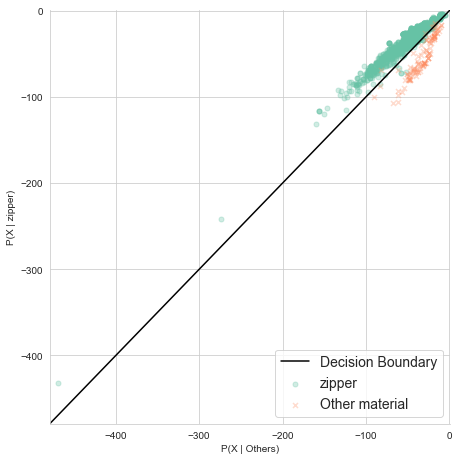

In [313]:
sns.lmplot(x = xaxis_label, y = yaxis_label, 
           data =summary_df, height = 6.5, 
           fit_reg=False, legend=False, scatter_kws={'alpha': 0.3, 's': 25}, 
           hue = labels, markers = ['o', 'x'], palette = 'Set2' )

plt.xlim([joint_log_ctg_1.min() - 10, 1])
plt.ylim([joint_log_ctg_1.min() - 10, 1])

plt.plot(linedata, linedata, color = 'black')

plt.legend(('Decision Boundary', SUBJECT , 'Other material'), 
           loc='lower right', fontsize = 14)

plt.show()

# False Positives and False Negatives
* The function up.unique() shows the nubmer of value 0 is 2347, the value 1 is 650.

In [314]:
np.unique(prediction, return_counts = True)

(array([False,  True]), array([1331,  122]))

### True positives
* It shows, the document is 1, the True, and model also predicts it as 1, True.
* In this case, the material is fabric in CATEGORY, and the prediction also say it is fabric.

In [315]:
true_pos = (y_test == 1)&(prediction == 1)

In [316]:
true_pos.sum()

109

### True negatives
* It shows, the document is 0, the False, and the model also predicts it as 0, False.
* In this case, the material is actually trim in CATEGORY, and the prediction also say it is trim.

In [317]:
true_neg = (y_test == 0)&(prediction ==0)

In [318]:
true_neg.sum()

1326

### False positives
* It shows, the document is 0, the False, and model predicts it as 1, True.
* In this case, the material is trim in CATEGORY, and yet prediction says it is fabric.

In [319]:
false_pos = (y_test == 0)&(prediction ==1)

In [320]:
false_pos.sum()

13

### False negtives
* It shows, the document is 1, the True, and model predicts it as 0, False.
* In this case, the material is fabric in CATEGORY, and yet prediction says it is trim.

In [321]:
false_neg = (y_test == 1)&(prediction == 0)

In [322]:
false_neg.sum()

5

In [323]:
(y_test == 1).sum()

114

# Recall Score
* It tells how much the model will omit the document. More the value close to 1, less the model will omit to fit document.
* It tells the reliability of the model, in other words, how much the model resemble to the relevant documents.
* More the value close to 1, less the model will omit any document.

In [324]:
recall_score = true_pos.sum() / (y_test == 1).sum()
print('Recall score is {:.2%}'. format(recall_score))

Recall score is 95.61%


# Precision Score
* It tells how precisely the model predicting.

In [325]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.893


# F-Score or F1 Score
* Closer the value to 1, better the model is.

In [326]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.92
